# 0.0 IMPORTS

## 0.1 Bibliotecas


In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats as ss

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## 0.2 Helper Functions

## 0.3 Loading data

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado


# 1.0 DATA DESCRIPTION

In [4]:
# fazendo uma copia do dataset
df1 = df.copy() 

## 1.1 Data Dimensions

In [5]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of coumns: {}'.format(df1.shape[1]))

Number of rows: 17836
Number of coumns: 12


## 1.2 Data Types

In [6]:
df1.dtypes

id_do_caso                         object
continente                         object
educacao_do_empregado              object
tem_experiencia_de_trabalho        object
requer_treinamento_de_trabalho     object
num_de_empregados                   int64
ano_de_estabelecimento              int64
regiao_de_emprego                  object
salario_prevalecente              float64
unidade_de_salario                 object
posicao_em_tempo_integral          object
status_do_caso                     object
dtype: object

## 1.3 Check NA

In [7]:
df1.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

## 1.4 Descriptive Statistics

In [8]:
# dados numericos
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# dados categoricos
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.4.1. Numerical Atributes

In [9]:
'''Dava para usar o comando df1.describe(), porém a forma a seguir tem mais analises '''

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T  # range
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T          # range
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T     # kurtosis

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,num_de_empregados,-26.0000,602069.00,602095.0000,5726.501850,2117.00,23320.723608,12.385660,210.492044
1,ano_de_estabelecimento,1800.0000,2016.00,216.0000,1979.494898,1997.00,42.096014,-2.030978,3.502421
2,salario_prevalecente,2.1367,319210.27,319208.1333,74327.428401,70106.92,52794.379516,0.763116,0.845217


Temos alguns valores estranhos, como pode ser visto na variavel 'num_de_empregados' que tem valor negativo.

### 1.4.2. Categorical Atributes

In [10]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

id_do_caso                        17836
continente                            6
educacao_do_empregado                 4
tem_experiencia_de_trabalho           2
requer_treinamento_de_trabalho        2
regiao_de_emprego                     5
unidade_de_salario                    4
posicao_em_tempo_integral             2
status_do_caso                        2
dtype: int64

In [11]:
# As variaveis categoricas com mais de 2 tipos distintos:

print('continente: ',            df1['continente'].unique())
print('educacao_do_empregado: ', df1['educacao_do_empregado'].unique())
print('regiao_de_emprego: ',     df1['regiao_de_emprego'].unique())
print('unidade_de_salario: ',    df1['unidade_de_salario'].unique())
print('regiao_de_emprego: ',     df1['regiao_de_emprego'].unique())

continente:  ['Europa' 'Ásia' 'América do Sul' 'América do Norte' 'África' 'Oceania']
educacao_do_empregado:  ['Ensino Médio' 'Mestrado' 'Ensino Superior' 'Doutorado']
regiao_de_emprego:  ['Sul' 'Meio-Oeste' 'Ilha' 'Nordeste' 'Oeste']
unidade_de_salario:  ['Ano' 'Semana' 'Hora' 'Mês']
regiao_de_emprego:  ['Sul' 'Meio-Oeste' 'Ilha' 'Nordeste' 'Oeste']


In [26]:
# features ...

# 2.0 VARIABLES FILTERING

Nessa etapa vamos filtrar os dados baseado nas restrições do negócio. 

Na etapa 1.4.1 vimos que a variavel 'num_de_empregados' tem valores negativos, o que não faz muito sentido para o negócio. Dessa forma, vamos exclui-los.


In [66]:
df2 = df1.copy()

In [67]:
print('Tinhamos {} valores negativos.'.format(len(df2[df2['num_de_empregados'] < 0.0])))

Tinhamos 29 valores negativos.


In [68]:
df2 = df2[df2['num_de_empregados'] > 0.0]

In [69]:
print('E agora temos {} valores negativos.'.format(len(df2[df2['num_de_empregados'] < 0.0])))

E agora temos 0 valores negativos.


# 3.0 EXPLORATORY DATA ANALYSIS (EDA)


Essa etapa tem como objetivo:
* Entender o negocio e gerar insights.
* Encontrar variaveis relevantes para o aprendizado do modelo.

In [73]:
df3 = df2.copy()

## 3.1. Analise Univariada

### 3.1.1 Response Variable

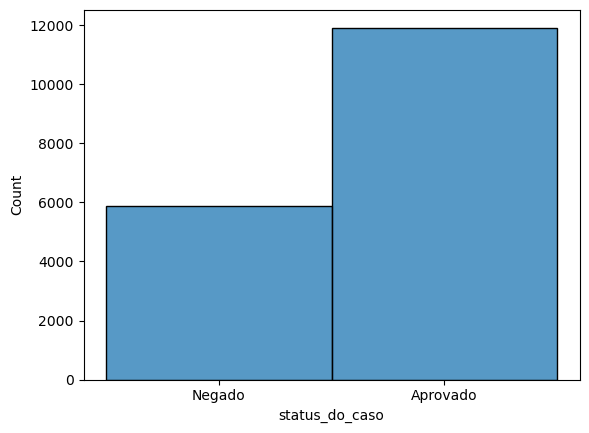

In [76]:
sns.histplot(data=df3, x='status_do_caso');

A variavel alvo esta desbalanceada, isso pode prejudicar o aprendizado do modelo.

### 3.1.2 Numerical Variable

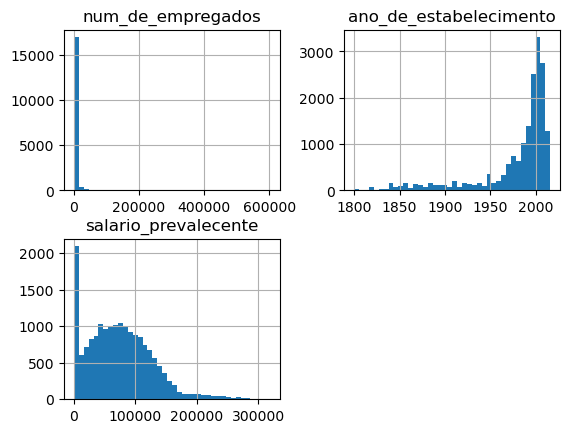

In [84]:
num_attributes.hist( bins=40);

A variavel num_de_empregados parece ter outliers bem grandes. Analisando seu boxplot:

<Axes: xlabel='num_de_empregados'>

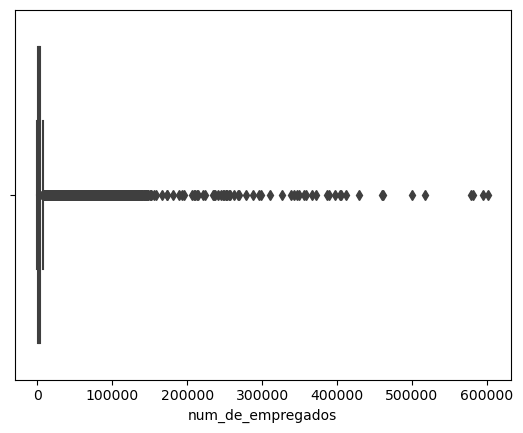

In [103]:
sns.boxplot(x=df3["num_de_empregados"])

In [102]:
aux = len(df3[df3["num_de_empregados"] > 20000])

print('Temos {} num_de_empregados maior que 20000. Isso representa {}% dos dados.'.format(aux, round(aux/df3.shape[0], 3)*100))

Temos 754 num_de_empregados maior que 20000. Isso representa 4.2% dos dados.


In [105]:
cat_attributes

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,regiao_de_emprego,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,Sul,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,Meio-Oeste,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,Ilha,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,Meio-Oeste,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,Nordeste,Ano,S,Aprovado
...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,Ásia,Mestrado,S,N,Oeste,Ano,S,Aprovado
17832,EZYV13200,Europa,Ensino Médio,N,N,Sul,Ano,S,Negado
17833,EZYV8903,América do Norte,Mestrado,N,N,Nordeste,Ano,S,Negado
17834,EZYV6163,América do Norte,Doutorado,S,N,Meio-Oeste,Ano,S,Aprovado


### 3.1.3 Categorical Variables

<Axes: xlabel='unidade_de_salario', ylabel='count'>

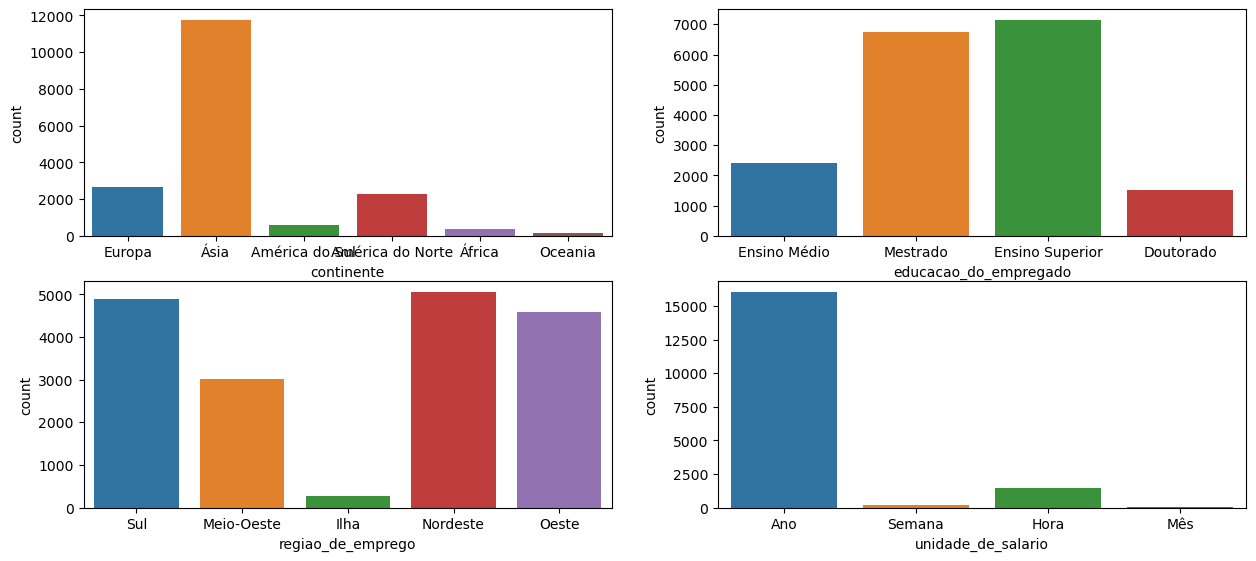

In [116]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
sns.countplot( x = df3['continente'])

plt.subplot(3, 2, 2)
sns.countplot( x = df3['educacao_do_empregado'])

plt.subplot(3, 2, 3)
sns.countplot( x = df3['regiao_de_emprego'])

plt.subplot(3, 2, 4)
sns.countplot( x = df3['unidade_de_salario'])

<Axes: xlabel='posicao_em_tempo_integral', ylabel='count'>

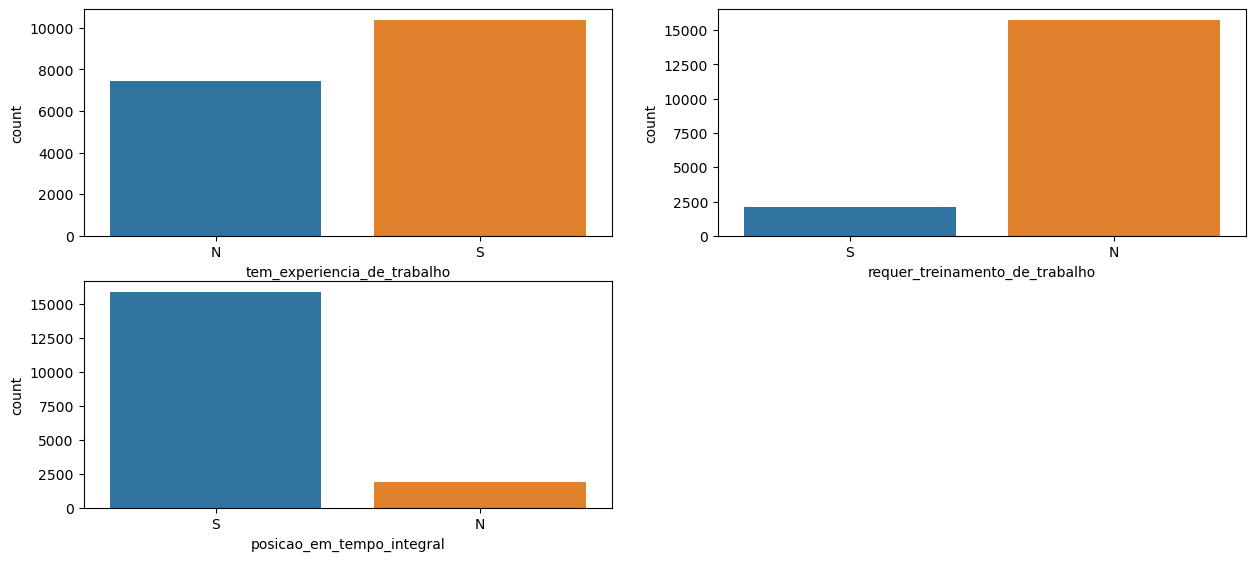

In [117]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
sns.countplot( x = df3['tem_experiencia_de_trabalho'])

plt.subplot(3, 2, 2)
sns.countplot( x = df3['requer_treinamento_de_trabalho'])

plt.subplot(3, 2, 3)
sns.countplot( x = df3['posicao_em_tempo_integral'])

## 3.2 Analise Multivariada

### 3.2.1. Numerical Attributes

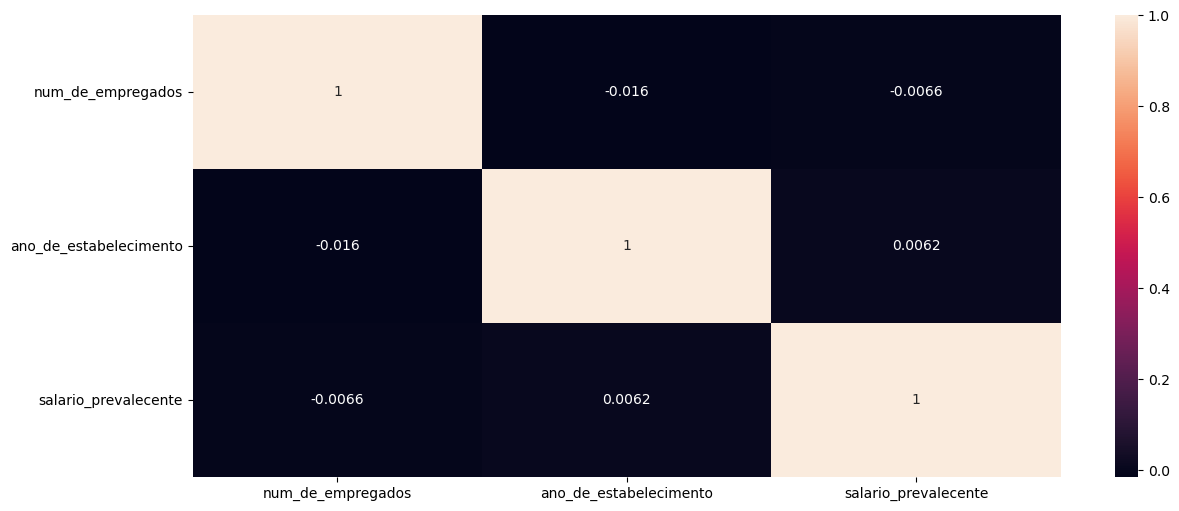

In [118]:
correlation = num_attributes.corr( method='pearson' )

fig = plt.figure(figsize = (14, 6)) 
sns.heatmap( correlation, annot=True );

### 3.2.2. Categorical Attributes

Para ver a correlação entre as variaveis categoricas vamos usar o metodo [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

In [132]:
def cramer_v( x, y ):
    """Essa função calcula correlação entre duas variaveis categoricas. Para isso útilizamos a medida Cramér's V.
    Imput: x e y são as variaveis categoricas
    output: Cramér's V
    variaveis:
        cm: é a matriz de confução
        n: soma de todos os valores
        r, k: é o numero de linhas e numero de colunas
        chi2: é o resultado do teste
        chi2corr, kcorr e rcorr: é uma correção da formula
    """
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape 
    
    chi2 = ss.chi2_contingency( cm )[0]   
    
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
        
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


In [133]:
# tirando a coluna 'id_do_caso'
a = cat_attributes[['continente', 'educacao_do_empregado',
       'tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho',
       'regiao_de_emprego', 'unidade_de_salario', 'posicao_em_tempo_integral',
       'status_do_caso']]

a.head()

,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,regiao_de_emprego,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,Europa,Ensino Médio,N,S,Sul,Ano,S,Negado
1,Ásia,Mestrado,S,N,Meio-Oeste,Ano,S,Aprovado
2,Ásia,Ensino Médio,N,N,Ilha,Ano,S,Negado
3,Ásia,Ensino Médio,N,N,Meio-Oeste,Semana,S,Negado
4,Ásia,Ensino Superior,S,N,Nordeste,Ano,S,Aprovado


<Axes: >

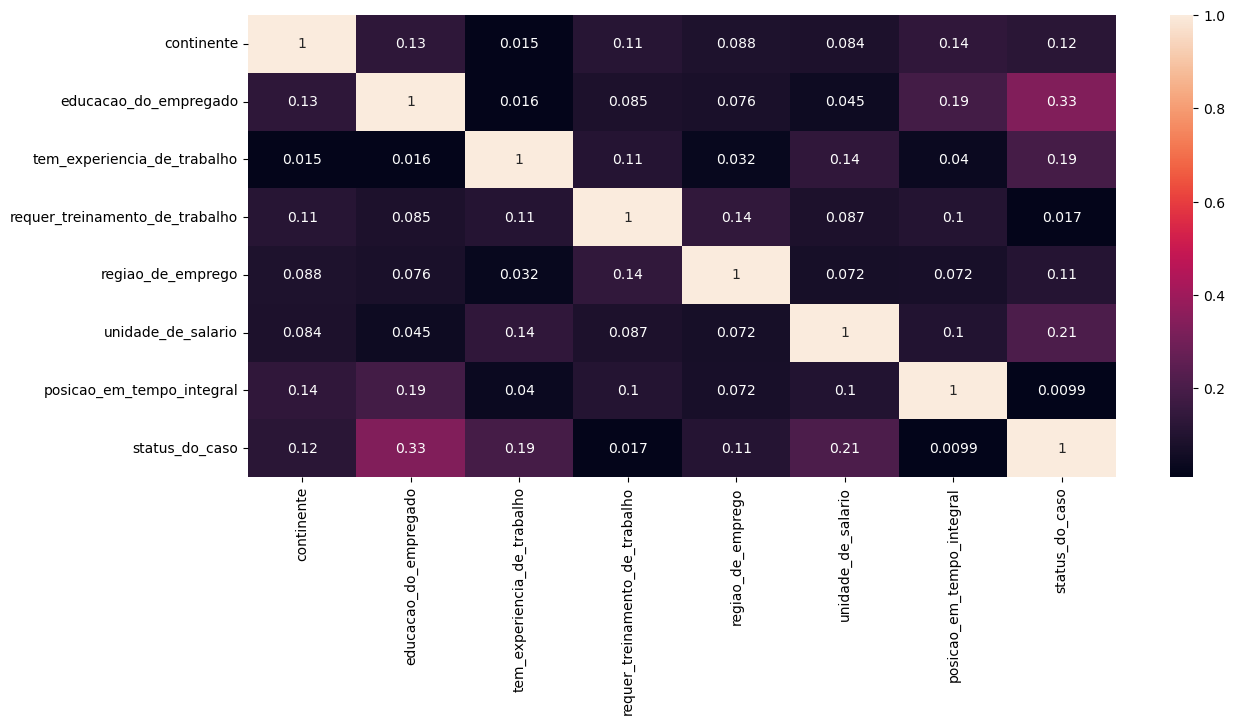

In [134]:
# Calculate cramer V
a1 = cramer_v( a['continente'], a['continente'] )
a2 = cramer_v( a['continente'], a['educacao_do_empregado'] )
a3 = cramer_v( a['continente'], a['tem_experiencia_de_trabalho'] )
a4 = cramer_v( a['continente'], a['requer_treinamento_de_trabalho'] )
a5 = cramer_v( a['continente'], a['regiao_de_emprego'] )
a6 = cramer_v( a['continente'], a['unidade_de_salario'] )
a7 = cramer_v( a['continente'], a['posicao_em_tempo_integral'] )
a8 = cramer_v( a['continente'], a['status_do_caso'] )

b1 = cramer_v( a['educacao_do_empregado'], a['continente'] )
b2 = cramer_v( a['educacao_do_empregado'], a['educacao_do_empregado'] )
b3 = cramer_v( a['educacao_do_empregado'], a['tem_experiencia_de_trabalho'] )
b4 = cramer_v( a['educacao_do_empregado'], a['requer_treinamento_de_trabalho'] )
b5 = cramer_v( a['educacao_do_empregado'], a['regiao_de_emprego'] )
b6 = cramer_v( a['educacao_do_empregado'], a['unidade_de_salario'] )
b7 = cramer_v( a['educacao_do_empregado'], a['posicao_em_tempo_integral'] )
b8 = cramer_v( a['educacao_do_empregado'], a['status_do_caso'] )

c1 = cramer_v( a['tem_experiencia_de_trabalho'], a['continente'] )
c2 = cramer_v( a['tem_experiencia_de_trabalho'], a['educacao_do_empregado'] )
c3 = cramer_v( a['tem_experiencia_de_trabalho'], a['tem_experiencia_de_trabalho'] )
c4 = cramer_v( a['tem_experiencia_de_trabalho'], a['requer_treinamento_de_trabalho'] )
c5 = cramer_v( a['tem_experiencia_de_trabalho'], a['regiao_de_emprego'] )
c6 = cramer_v( a['tem_experiencia_de_trabalho'], a['unidade_de_salario'] )
c7 = cramer_v( a['tem_experiencia_de_trabalho'], a['posicao_em_tempo_integral'] )
c8 = cramer_v( a['tem_experiencia_de_trabalho'], a['status_do_caso'] )

d1 = cramer_v( a['requer_treinamento_de_trabalho'], a['continente'] )
d2 = cramer_v( a['requer_treinamento_de_trabalho'], a['educacao_do_empregado'] )
d3 = cramer_v( a['requer_treinamento_de_trabalho'], a['tem_experiencia_de_trabalho'] )
d4 = cramer_v( a['requer_treinamento_de_trabalho'], a['requer_treinamento_de_trabalho'] )
d5 = cramer_v( a['requer_treinamento_de_trabalho'], a['regiao_de_emprego'] )
d6 = cramer_v( a['requer_treinamento_de_trabalho'], a['unidade_de_salario'] )
d7 = cramer_v( a['requer_treinamento_de_trabalho'], a['posicao_em_tempo_integral'] )
d8 = cramer_v( a['requer_treinamento_de_trabalho'], a['status_do_caso'] )

e1 = cramer_v( a['regiao_de_emprego'], a['continente'] )
e2 = cramer_v( a['regiao_de_emprego'], a['educacao_do_empregado'] )
e3 = cramer_v( a['regiao_de_emprego'], a['tem_experiencia_de_trabalho'] )
e4 = cramer_v( a['regiao_de_emprego'], a['requer_treinamento_de_trabalho'] )
e5 = cramer_v( a['regiao_de_emprego'], a['regiao_de_emprego'] )
e6 = cramer_v( a['regiao_de_emprego'], a['unidade_de_salario'] )
e7 = cramer_v( a['regiao_de_emprego'], a['posicao_em_tempo_integral'] )
e8 = cramer_v( a['regiao_de_emprego'], a['status_do_caso'] )

f1 = cramer_v( a['unidade_de_salario'], a['continente'] )
f2 = cramer_v( a['unidade_de_salario'], a['educacao_do_empregado'] )
f3 = cramer_v( a['unidade_de_salario'], a['tem_experiencia_de_trabalho'] )
f4 = cramer_v( a['unidade_de_salario'], a['requer_treinamento_de_trabalho'] )
f5 = cramer_v( a['unidade_de_salario'], a['regiao_de_emprego'] )
f6 = cramer_v( a['unidade_de_salario'], a['unidade_de_salario'] )
f7 = cramer_v( a['unidade_de_salario'], a['posicao_em_tempo_integral'] )
f8 = cramer_v( a['unidade_de_salario'], a['status_do_caso'] )

g1 = cramer_v( a['posicao_em_tempo_integral'], a['continente'] )
g2 = cramer_v( a['posicao_em_tempo_integral'], a['educacao_do_empregado'] )
g3 = cramer_v( a['posicao_em_tempo_integral'], a['tem_experiencia_de_trabalho'] )
g4 = cramer_v( a['posicao_em_tempo_integral'], a['requer_treinamento_de_trabalho'] )
g5 = cramer_v( a['posicao_em_tempo_integral'], a['regiao_de_emprego'] )
g6 = cramer_v( a['posicao_em_tempo_integral'], a['unidade_de_salario'] )
g7 = cramer_v( a['posicao_em_tempo_integral'], a['posicao_em_tempo_integral'] )
g8 = cramer_v( a['posicao_em_tempo_integral'], a['status_do_caso'] )

h1 = cramer_v( a['status_do_caso'], a['continente'] )
h2 = cramer_v( a['status_do_caso'], a['educacao_do_empregado'] )
h3 = cramer_v( a['status_do_caso'], a['tem_experiencia_de_trabalho'] )
h4 = cramer_v( a['status_do_caso'], a['requer_treinamento_de_trabalho'] )
h5 = cramer_v( a['status_do_caso'], a['regiao_de_emprego'] )
h6 = cramer_v( a['status_do_caso'], a['unidade_de_salario'] )
h7 = cramer_v( a['status_do_caso'], a['posicao_em_tempo_integral'] )
h8 = cramer_v( a['status_do_caso'], a['status_do_caso'] )



# Final dataset
d = pd.DataFrame( {'continente':                  [a1, a2, a3, a4, a5, a6, a7, a8],
                'educacao_do_empregado':          [b1, b2, b3, b4, b5, b6, b7, b8],
                'tem_experiencia_de_trabalho':    [c1, c2, c3, c4, c5, c6, c7, c8],
                'requer_treinamento_de_trabalho': [d1, d2, d3, d4, d5, d6, d7, d8],
                'regiao_de_emprego':              [e1, e2, e3, e4, e5, e6, e7, e8],
                'unidade_de_salario':             [f1, f2, f3, f4, f5, f6, f7, f8],
                'posicao_em_tempo_integral':      [g1, g2, g3, g4, g5, g6, g7, g8],
                'status_do_caso':                 [h1, h2, h3, h4, h5, h6, h7, h8]                                              
                })
d = d.set_index( d.columns )

fig = plt.figure(figsize = (14, 6)) 
sns.heatmap( d, annot=True )

# 4.0  DATA PREPARATION

Nessa etapa preparamos os dados. Para isso fazemos algumas transformações, como normalizar os dados e transformar as variaveis categóricas em númericas.

In [166]:
df4 = df3.copy()

## 4.1 Normalizacao


A escala das variáveis numéricas do conjunto de dados é muito diferente e pode gerar um viés no modelo de machine learning. Desse modo, vamos normalizar os dados, colocando todos em uma mesma escala.



In [167]:
rs = RobustScaler()   # Usar quando os outliers são bem fortes
mms = MinMaxScaler()  # Usar quando os outliers não são tão relevantes

# competition distance
df4['num_de_empregados'] = rs.fit_transform( df4[['num_de_empregados']].values )
df4['ano_de_estabelecimento'] = mms.fit_transform( df4[['ano_de_estabelecimento']].values )
df4['salario_prevalecente'] = mms.fit_transform( df4[['salario_prevalecente']].values )



## 4.2 Encoding 

In [168]:
# Transformando as colunas categorica com apenas 2 classes em númericas - Ordinal Encoding
assortment_dict = {'N': 0, 'S': 1}
assortment_dict1 = {'Negado': 0, 'Aprovado': 1}

df4['requer_treinamento_de_trabalho'] = df4['requer_treinamento_de_trabalho'].map( assortment_dict )
df4['posicao_em_tempo_integral']      = df4['posicao_em_tempo_integral'].map( assortment_dict )
df4['tem_experiencia_de_trabalho']    = df4['tem_experiencia_de_trabalho'].map( assortment_dict )
df4['status_do_caso']                 = df4['status_do_caso'].map( assortment_dict1 )

In [169]:
df4['unidade_de_salario'].unique()

array(['Ano', 'Semana', 'Hora', 'Mês'], dtype=object)

In [170]:
# Transformando as colunas categorica com mais de 2 classes em númericas

# One Hot Encoding
df4 = pd.get_dummies( df4, prefix=['unidade_de_salario'], columns=['unidade_de_salario'] )


# store_type - Label Encoding
le = LabelEncoder()
df4['continente'] = le.fit_transform( df4['continente'] )
df4['regiao_de_emprego'] = le.fit_transform( df4['regiao_de_emprego'] )


# Ordinal Encoding
assortment_dict = {'Ensino Médio': 1, 'Mestrado': 2, 'Ensino Superior': 3, 'Doutorado': 4}
df4['educacao_do_empregado'] = df4['educacao_do_empregado'].map( assortment_dict )

# assortment_dict = {'Hora': 1, 'Semana': 2, 'Mês': 3, 'Ano': 4}
# df4['unidade_de_salario'] = df4['unidade_de_salario'].map( assortment_dict )

In [171]:
df4

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,posicao_em_tempo_integral,status_do_caso,unidade_de_salario_Ano,unidade_de_salario_Hora,unidade_de_salario_Mês,unidade_de_salario_Semana
0,EZYV10567,2,1,0,1,-0.013712,0.254630,4,0.218381,1,0,1,0,0,0
1,EZYV5505,5,2,1,0,1.560799,0.939815,1,0.165814,1,1,1,0,0,0
2,EZYV5207,5,1,0,0,-0.280298,0.925926,0,0.347197,1,0,1,0,0,0
3,EZYV7545,5,1,0,0,0.695705,0.888889,1,0.287845,1,0,0,0,0,1
4,EZYV16071,5,3,1,0,0.740472,0.689815,2,0.432799,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,EZYV17821,5,2,1,0,37.598709,0.902778,3,0.218322,1,1,1,0,0,0
17832,EZYV13200,2,1,0,0,-0.257310,0.398148,4,0.426792,1,0,1,0,0,0
17833,EZYV8903,0,2,0,0,-0.248840,0.972222,2,0.370245,1,0,1,0,0,0
17834,EZYV6163,0,4,1,0,100.764670,0.972222,1,0.291757,1,1,1,0,0,0


# 5.0 SPLIT DATAFRAME INTO TRAINING AND TEST DATASET

In [179]:
df5 =df4.copy()

## 5.1 Divisão das variáveis

In [180]:
 # Lembrando que a variável alvo é 'status_do_caso'.

x = df5.drop(['status_do_caso'], axis = 1)
y = df5['status_do_caso']

## 5.2 Separação de dados (treino e teste)

In [184]:
SEED = 144  # semente

x_treino, x_teste, y_treino, y_teste = train_test_split( x, y, random_state = SEED)


base_treino = x_treino.shape[0]
base_teste = x_teste.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))

A base de treino tem 13355 elementos e a base de teste tem 4452 elementos.


# 6.0 MACHINE LEARNING MODELLING


## 6.1 Aprendizado Oversampling

In [189]:
smote = SMOTE(random_state = SEED)
X_balanceado_over, y_balanceado_over = smote.fit_resample(x_treino, y_treino)
X_balanceado_over

ValueError: could not convert string to float: 'EZYV2589'